In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/flightdelay/DelayedFlights.csv


In [2]:
df = pd.read_csv('/kaggle/input/flightdelay/DelayedFlights.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In [6]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4

columns_to_drop = ["Unnamed: 0", "Year", "DayofMonth", "DepTime", "DepDelay", "ArrTime", "CRSArrTime", "ActualElapsedTime", "Diverted", "Cancelled", "Distance", "FlightNum", "TailNum"]
df = df.drop(columns=columns_to_drop)

In [7]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Month'].apply(get_season)

df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6,7] else 0)

In [8]:
df.value_counts('Status')

Status
1.0    799660
0.0    680883
2.0    447828
3.0      7754
4.0       633
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

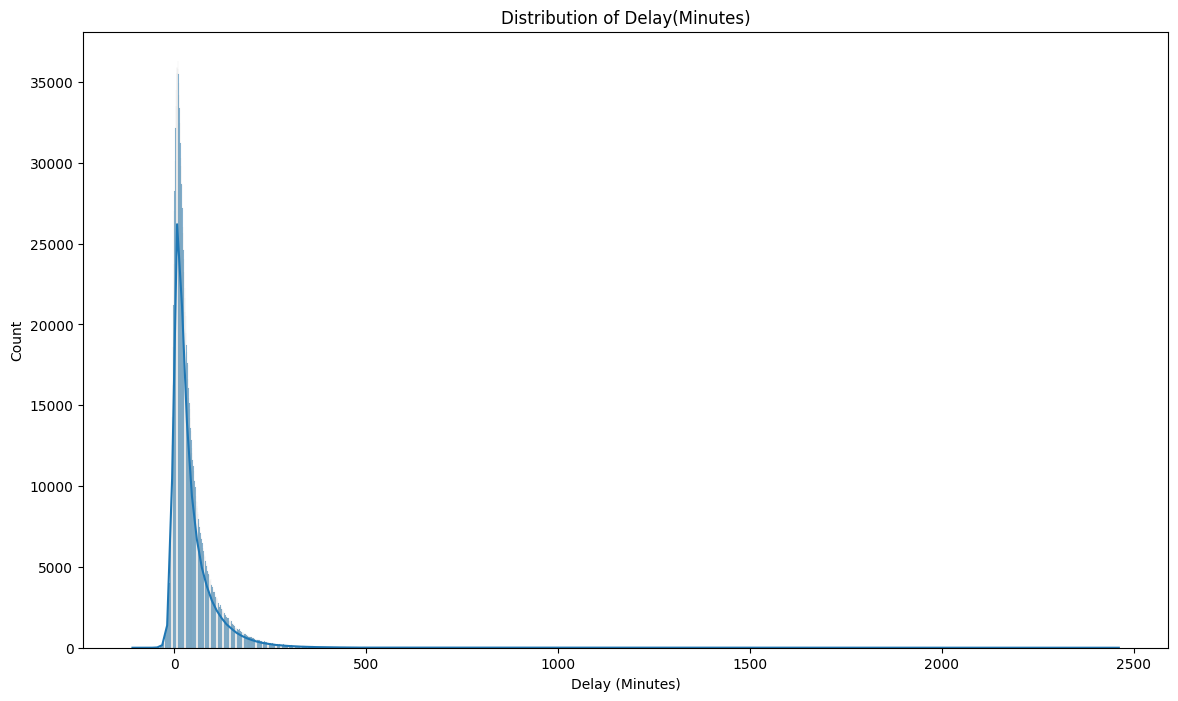

In [9]:
plt.figure(figsize=(14,8))
sns.histplot(df.ArrDelay, kde=True)
plt.xlabel('Delay (Minutes)')
plt.ylabel('Count')
plt.title('Distribution of Delay(Minutes)')
plt.show

In [10]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]

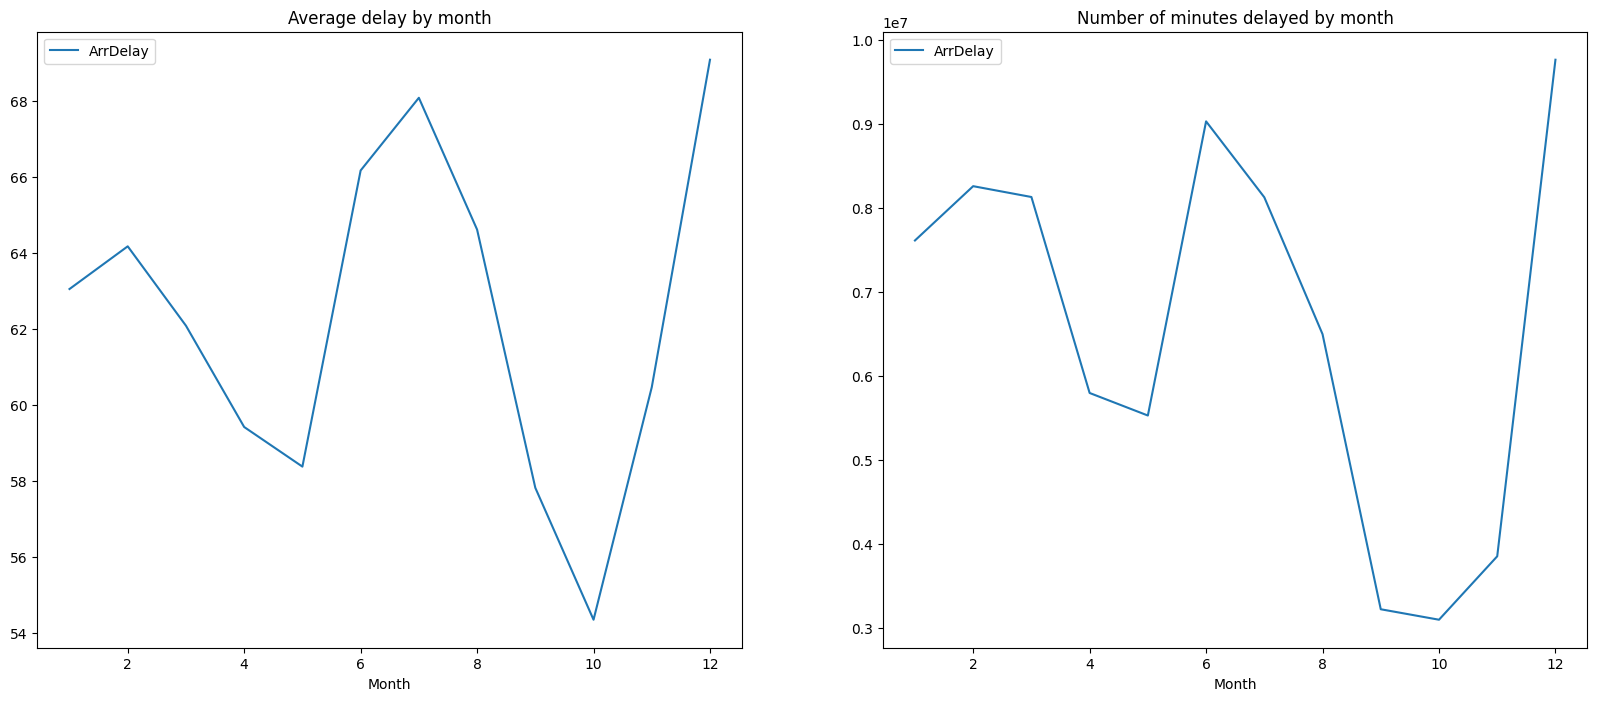

In [11]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month', 'ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month', 'ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

In [12]:
from ydata_profiling import ProfileReport

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [13]:
#ProfileReport(df)

In [14]:
df.head()

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,TaxiIn,...,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,Status,Season,IsWeekend
0,1,4,1955,WN,150.0,116.0,-14.0,IAD,TPA,4.0,...,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0.0,Winter,0
1,1,4,735,WN,145.0,113.0,2.0,IAD,TPA,5.0,...,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0.0,Winter,0
2,1,4,620,WN,90.0,76.0,14.0,IND,BWI,3.0,...,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0.0,Winter,0
3,1,4,1755,WN,90.0,77.0,34.0,IND,BWI,3.0,...,N,2.0,0.0,0.0,0.0,32.0,2008-01-03,1.0,Winter,0
4,1,4,1915,WN,115.0,87.0,11.0,IND,JAX,4.0,...,N,NaN,NaN,NaN,NaN,NaN,2008-01-03,0.0,Winter,0


In [15]:
one_hot = pd.get_dummies(df['Season'])
df = df.join(one_hot)

In [16]:
df.drop(['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode', 'Season', 'DepDate'], axis=1, inplace=True)

In [17]:
columns_with_nans = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[columns_with_nans] = df[columns_with_nans].fillna(0)

In [18]:
df.drop_duplicates()

,Month,DayOfWeek,CRSDepTime,CRSElapsedTime,AirTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status,IsWeekend,Fall,Spring,Summer,Winter
0,1,4,1955,150.0,116.0,-14.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
1,1,4,735,145.0,113.0,2.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
2,1,4,620,90.0,76.0,14.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
3,1,4,1755,90.0,77.0,34.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1.0,0,False,False,False,True
4,1,4,1915,115.0,87.0,11.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,6,1220,152.0,120.0,25.0,9.0,18.0,3.0,0.0,0.0,0.0,22.0,1.0,1,False,False,False,True
1936754,12,6,600,109.0,78.0,75.0,15.0,34.0,0.0,57.0,18.0,0.0,0.0,2.0,1,False,False,False,True
1936755,12,6,847,143.0,122.0,99.0,8.0,32.0,1.0,0.0,19.0,0.0,79.0,2.0,1,False,False,False,True
1936756,12,6,1240,117.0,89.0,9.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1,False,False,False,True


In [19]:
df = df.dropna(subset=['CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut'])

In [20]:
X = df.drop('ArrDelay', axis=1)
y = df['ArrDelay']

In [21]:
X.head()

,Month,DayOfWeek,CRSDepTime,CRSElapsedTime,AirTime,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status,IsWeekend,Fall,Spring,Summer,Winter
0,1,4,1955,150.0,116.0,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
1,1,4,735,145.0,113.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
2,1,4,620,90.0,76.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True
3,1,4,1755,90.0,77.0,3.0,10.0,2.0,0.0,0.0,0.0,32.0,1.0,0,False,False,False,True
4,1,4,1915,115.0,87.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False,False,False,True


In [22]:
y.head()

0   -14.0
1     2.0
2    14.0
3    34.0
4    11.0
Name: ArrDelay, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
len(X_train), len(X_test)

(1542696, 385675)

In [26]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 75.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [30]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression()

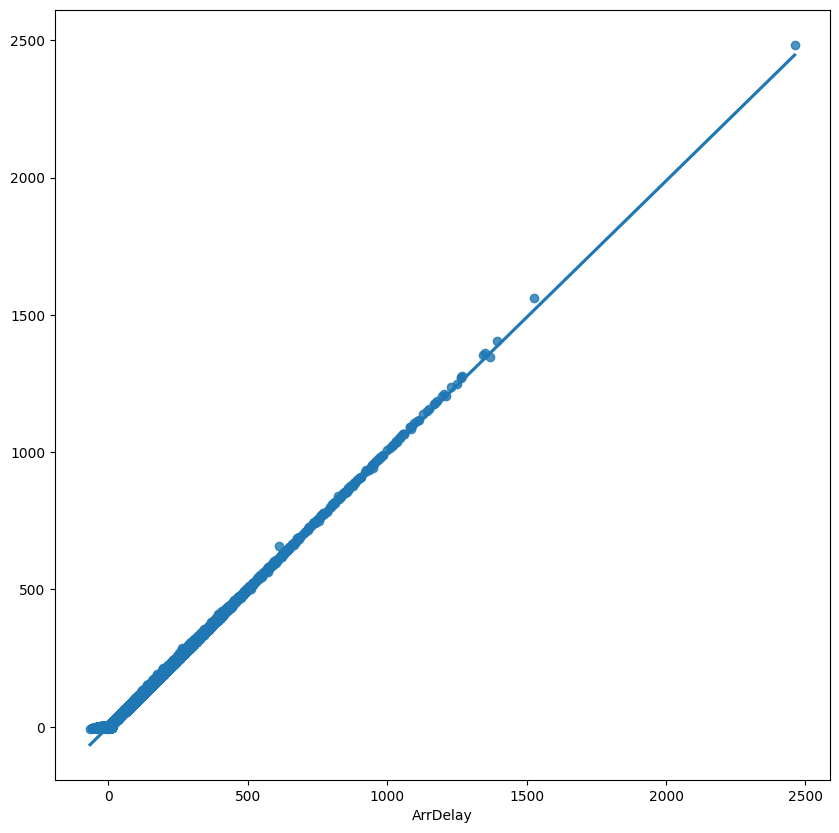

In [31]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y = lr.predict(X_test_std))
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test, lr.predict(X_test_std))
mean_squared_error(y_test, lr.predict(X_test_std), squared=True)
mean_squared_error(y_test, lr.predict(X_test_std), squared=False)
r2_score(y_test, lr.predict(X_test_std))

0.9937108698097125

In [33]:
%%time
from pycaret.regression import *
experiment = setup(data=df, target='ArrDelay')

,Description,Value
0,Session id,2803
1,Target,ArrDelay
2,Target type,Regression
3,Original data shape,"(1928371, 19)"
4,Transformed data shape,"(1928371, 19)"
5,Transformed train set shape,"(1349859, 19)"
6,Transformed test set shape,"(578512, 19)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


CPU times: user 27 s, sys: 2.44 s, total: 29.4 s
Wall time: 31.1 s


In [34]:
lr_model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9761,20.4463,4.5218,0.9937,0.5792,0.3495
1,2.9786,20.4088,4.5176,0.9936,0.5803,0.3520
2,2.9897,20.5630,4.5346,0.9936,0.5797,0.3493
3,2.9698,20.4097,4.5177,0.9937,0.5789,0.3480
4,2.9708,20.2483,4.4998,0.9937,0.5780,0.3521
5,2.9891,20.5769,4.5362,0.9937,0.5824,0.3500
6,2.9900,20.6399,4.5431,0.9936,0.5832,0.3487
7,2.9852,20.5339,4.5314,0.9937,0.5808,0.3511
8,2.9615,20.3275,4.5086,0.9937,0.5785,0.3460


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
dt_model = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.4072,30.9360,5.5620,0.9904,0.5353,0.4914
1,2.4295,31.3187,5.5963,0.9902,0.5374,0.4977
2,2.4221,32.0931,5.6651,0.9899,0.5345,0.4923
3,2.4088,32.0501,5.6613,0.9901,0.5337,0.4898
4,2.4337,34.7889,5.8982,0.9892,0.5368,0.4944
5,2.4542,31.7363,5.6335,0.9903,0.5371,0.4943
6,2.4364,32.3035,5.6836,0.9899,0.5375,0.4935
7,2.4459,40.2441,6.3438,0.9877,0.5403,0.5013
8,2.4102,28.5136,5.3398,0.9911,0.5350,0.4904


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
evaluate_model(lr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
evaluate_model(dt_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
tuned_lr_model = tune_model(lr_model, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9761,20.4463,4.5218,0.9937,0.5792,0.3495
1,2.9786,20.4088,4.5176,0.9936,0.5803,0.3520
2,2.9897,20.5630,4.5346,0.9936,0.5797,0.3493
3,2.9698,20.4097,4.5177,0.9937,0.5789,0.3480
4,2.9708,20.2483,4.4998,0.9937,0.5780,0.3521
5,2.9891,20.5769,4.5362,0.9937,0.5824,0.3500
6,2.9900,20.6399,4.5431,0.9936,0.5832,0.3487
7,2.9852,20.5339,4.5314,0.9937,0.5808,0.3511
8,2.9615,20.3275,4.5086,0.9937,0.5785,0.3460


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
final_model = finalize_model(tuned_lr_model)

In [40]:
save_model(final_model, 'finalized_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Month', 'DayOfWeek', 'CRSDepTime',
                                              'CRSElapsedTime', 'AirTime',
                                              'TaxiIn', 'TaxiOut',
                                              'CarrierDelay', 'WeatherDelay',
                                              'NASDelay', 'SecurityDelay',
                                              'LateAircraftDelay', 'Status',
                                              'IsWeekend'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LinearRegression(n_jobs=-1))]),
 'finalized_lr_model.pkl')